Information gain - mutual information

In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile

In [8]:
# load dataset - classification 
data=pd.read_csv(r"E:\Study_Material\UDEMY_DS\Feature_Selection\Data_Sets\Paribas\paribas.csv",nrows=50000)

In [9]:
data.shape

(50000, 133)

In [10]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [16]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

In [17]:
# separate train and test sets
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['target', 'ID'], axis=1),data['target'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [18]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target
mi=mutual_info_classif(X_train.fillna(0),y_train)

In [19]:
mi

array([3.19731705e-03, 4.15149602e-03, 4.38954642e-03, 2.84797040e-03,
       4.33910133e-03, 6.67472575e-03, 3.52254851e-03, 4.32805341e-03,
       2.51199772e-02, 0.00000000e+00, 1.73125066e-02, 8.35663423e-03,
       2.23627079e-02, 4.96650182e-03, 6.90497566e-03, 2.09314595e-03,
       4.77563986e-03, 4.80330658e-03, 1.89104777e-03, 1.19187752e-02,
       0.00000000e+00, 3.99272354e-03, 0.00000000e+00, 4.23629491e-03,
       3.60299854e-03, 3.91466513e-03, 2.86774187e-03, 5.24992579e-03,
       8.49688332e-03, 3.18934651e-03, 4.06826943e-03, 2.48770632e-03,
       2.37398121e-03, 6.05628594e-03, 7.12200852e-03, 3.12589910e-03,
       6.67879249e-03, 3.26347298e-03, 4.53856081e-03, 3.37474442e-03,
       4.50647813e-03, 7.39096402e-04, 6.38767178e-03, 3.90389581e-02,
       8.93357749e-03, 3.70431567e-03, 5.23181869e-03, 2.64638559e-03,
       4.86564021e-03, 5.13562380e-03, 3.23760538e-03, 4.49283665e-03,
       3.34820060e-03, 1.71604032e-02, 5.23601125e-03, 2.47072931e-03,
      

In [22]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

v50    0.039039
v10    0.025120
v14    0.022363
v12    0.017313
v62    0.017160
         ...   
v97    0.000000
v78    0.000000
v26    0.000000
v68    0.000000
v11    0.000000
Length: 112, dtype: float64

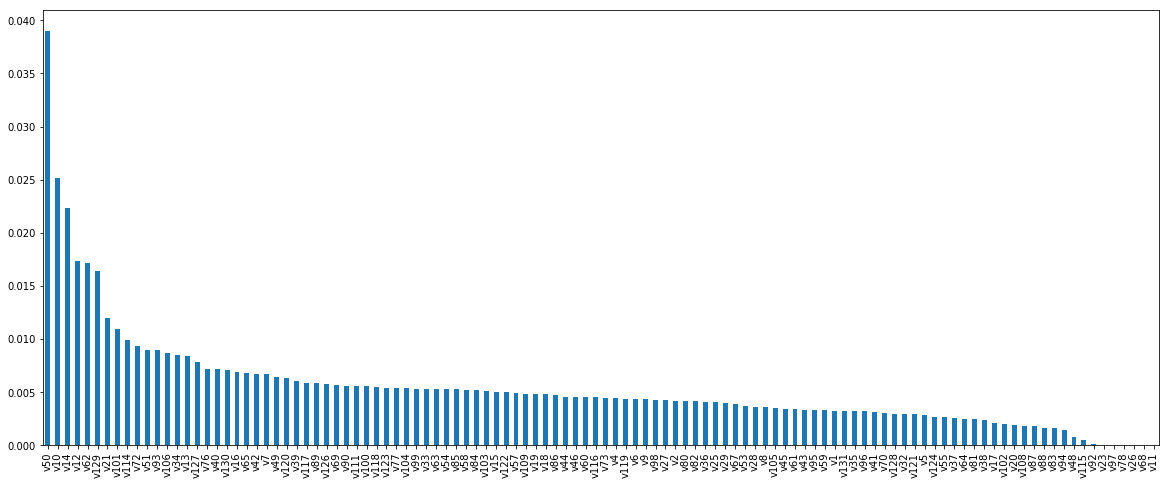

In [23]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [24]:
# here I will select the top 10 features
# which are shown below
sel_=SelectKBest(mutual_info_classif,k=10).fit(X_train.fillna(0),y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v50', 'v62', 'v101', 'v114', 'v129',
       'v130'],
      dtype='object')

Regression

In [26]:
# load dataset
data = pd.read_csv(r'E:\Study_Material\UDEMY_DS\Feature_Selection\Data_Sets\House_Price\houseprice.csv')
data.shape

(1460, 81)

In [27]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [28]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [29]:
# determine the mutual information
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

OverallQual      0.538107
GrLivArea        0.479296
TotalBsmtSF      0.383374
GarageArea       0.373164
GarageCars       0.372062
YearBuilt        0.344393
1stFlrSF         0.312965
FullBath         0.268371
GarageYrBlt      0.266758
MSSubClass       0.261876
YearRemodAdd     0.245915
2ndFlrSF         0.223194
LotFrontage      0.214700
TotRmsAbvGrd     0.186246
Fireplaces       0.174942
OpenPorchSF      0.170656
LotArea          0.165499
BsmtFinSF1       0.158478
BsmtUnfSF        0.111273
MasVnrArea       0.097210
OverallCond      0.093024
HalfBath         0.075559
WoodDeckSF       0.068609
BedroomAbvGr     0.044309
ScreenPorch      0.029074
BsmtFullBath     0.027675
KitchenAbvGr     0.010951
EnclosedPorch    0.003264
YrSold           0.000000
BsmtHalfBath     0.000000
BsmtFinSF2       0.000000
LowQualFinSF     0.000000
MoSold           0.000000
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
Id               0.000000
dtype: float64

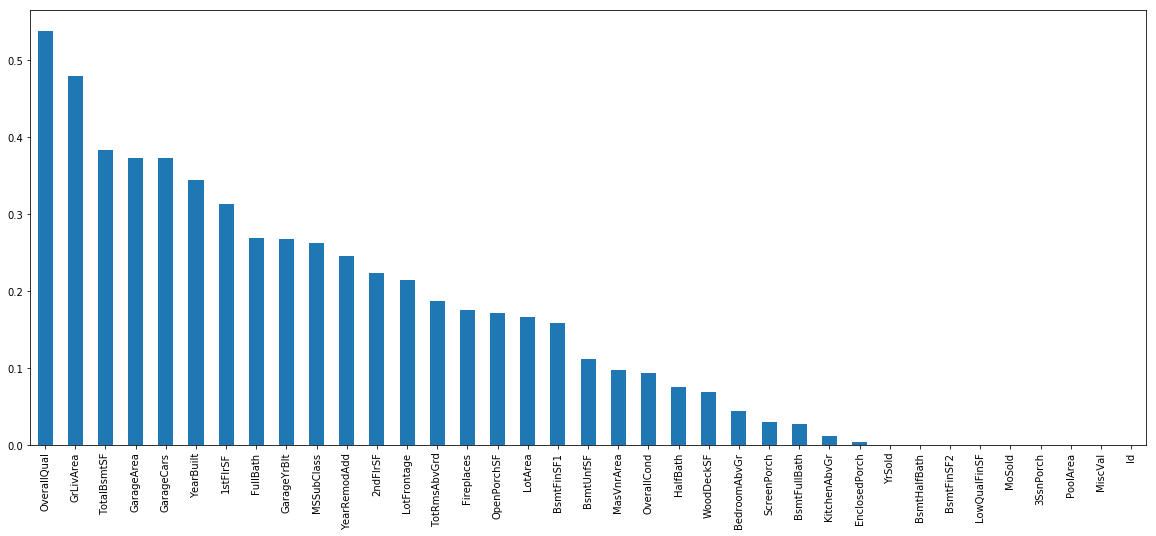

In [30]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [35]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

In [36]:
# here I will select the top 10 percentile
sel_ = SelectKBest(mutual_info_regression, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')